<a href="https://colab.research.google.com/github/Nanoth-T/Learning-Machine-Learning/blob/main/sinewith_noise_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn

In [ ]:


t = np.arange(0, 20, 0.1)

#random data on x-axis
A  = np.random.rand()
b    = 20*np.random.rand()
ceta = 2*np.random.rand()*np.pi

signal =  A*np.sin(t+ceta)+b
y      =  signal + 0.1*np.random.randn(len(t))


print(f"A = {A}, ceta = {ceta} b= {b}")

A = 0.5264593721559765, ceta = 5.080795940368906 b= 13.857957379881016


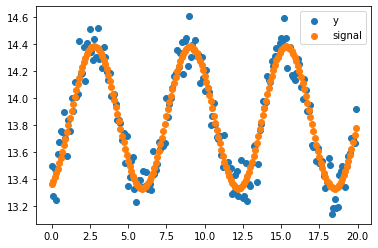

In [ ]:

plt.scatter(t,y)
plt.scatter(t,signal)
plt.legend(['y','signal'])

In [ ]:
# Create the linear regression model

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.ceta = torch.nn.Parameter(torch.randn(3))
        #ceta is vector size = 3 = parameters (A, ceta, b)


    def forward(self, x):
        return self.ceta[0]*torch.sin(x+self.ceta[1])+self.ceta[2]


model = MyModel()

model

MyModel()

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [ ]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
N = len(t)
X = t.reshape(N, 1)
Y = y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [ ]:
# Train the model
n_epochs = 1000
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/1000, Loss: 194.7362
Epoch 2/1000, Loss: 157.7181
Epoch 3/1000, Loss: 127.7568
Epoch 4/1000, Loss: 103.5026
Epoch 5/1000, Loss: 83.8653
Epoch 6/1000, Loss: 67.9638
Epoch 7/1000, Loss: 55.0859
Epoch 8/1000, Loss: 44.6554
Epoch 9/1000, Loss: 36.2064
Epoch 10/1000, Loss: 29.3620
Epoch 11/1000, Loss: 23.8169
Epoch 12/1000, Loss: 19.3241
Epoch 13/1000, Loss: 15.6837
Epoch 14/1000, Loss: 12.7337
Epoch 15/1000, Loss: 10.3431
Epoch 16/1000, Loss: 8.4057
Epoch 17/1000, Loss: 6.8354
Epoch 18/1000, Loss: 5.5626
Epoch 19/1000, Loss: 4.5308
Epoch 20/1000, Loss: 3.6944
Epoch 21/1000, Loss: 3.0162
Epoch 22/1000, Loss: 2.4663
Epoch 23/1000, Loss: 2.0204
Epoch 24/1000, Loss: 1.6587
Epoch 25/1000, Loss: 1.3652
Epoch 26/1000, Loss: 1.1271
Epoch 27/1000, Loss: 0.9339
Epoch 28/1000, Loss: 0.7770
Epoch 29/1000, Loss: 0.6496
Epoch 30/1000, Loss: 0.5461
Epoch 31/1000, Loss: 0.4620
Epoch 32/1000, Loss: 0.3935
Epoch 33/1000, Loss: 0.3378
Epoch 34/1000, Loss: 0.2925
Epoch 35/1000, Loss: 0.2555
Epoch 36/1

In [ ]:
for name, param in model.state_dict().items():
    print(f"{name}: {param}")

ceta: tensor([ 0.5310, -1.1724, 13.8589])


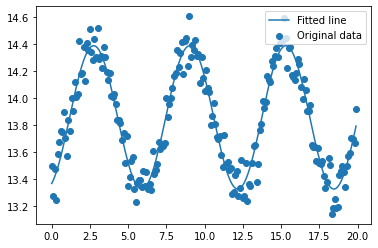

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()